In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a pandas data frame
credit_card_data = pd.read_csv("/content/creditcard.csv")

In [ ]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
29794,35633,0.786689,-0.691214,-0.329291,0.149435,0.714779,1.949061,-0.136906,0.474172,0.206173,...,-0.165285,-0.793473,-0.030110,-2.358519,-0.096468,0.332321,-0.001435,0.025559,200.00,0.0
29795,35633,0.800996,-2.159993,0.008378,-1.081828,-1.768799,-0.445016,-0.571165,-0.162429,-1.785636,...,0.016930,-0.350492,-0.234889,0.062628,0.163018,-0.212022,-0.024151,0.077021,363.00,0.0
29796,35633,1.115726,-0.472602,0.983034,0.294673,-1.218768,-0.341755,-0.667340,0.171155,0.805427,...,0.104463,0.366801,-0.073219,0.623597,0.247275,1.121835,-0.060566,0.003541,36.92,0.0
29797,35634,1.239103,-1.000617,0.843324,-0.560021,-1.400343,-0.151696,-1.026058,-0.001637,-0.131138,...,0.325954,0.855203,-0.245683,-0.072671,0.512799,-0.023495,0.036574,0.035202,91.00,0.0
29798,35634,1.374193,-0.720679,0.891375,-0.541402,-1.700000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29799 entries, 0 to 29798
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    29799 non-null  int64  
 1   V1      29799 non-null  float64
 2   V2      29799 non-null  float64
 3   V3      29799 non-null  float64
 4   V4      29799 non-null  float64
 5   V5      29799 non-null  float64
 6   V6      29798 non-null  float64
 7   V7      29798 non-null  float64
 8   V8      29798 non-null  float64
 9   V9      29798 non-null  float64
 10  V10     29798 non-null  float64
 11  V11     29798 non-null  float64
 12  V12     29798 non-null  float64
 13  V13     29798 non-null  float64
 14  V14     29798 non-null  float64
 15  V15     29798 non-null  float64
 16  V16     29798 non-null  float64
 17  V17     29798 non-null  float64
 18  V18     29798 non-null  float64
 19  V19     29798 non-null  float64
 20  V20     29798 non-null  float64
 21  V21     29798 non-null  float64
 22

In [ ]:
# check for missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,1
V7,1
V8,1
V9,1


In [ ]:
# Impute missing values with the mean of each column
credit_card_data.fillna(credit_card_data.mean(), inplace=True)

# Check if null values are removed
print(credit_card_data.isnull().sum())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
credit_card_data['Class'].value_counts()

,count
Class,
0.000000,29704
1.000000,94
0.003155,1


In [ ]:
# Filter rows with the unexpected value
unexpected_rows = credit_card_data[credit_card_data['Class'] == 0.003689]
print(unexpected_rows)


Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []

[0 rows x 31 columns]


In [ ]:
# Replace the unexpected value with 0 or 1 (based on your investigation)
credit_card_data['Class'] = credit_card_data['Class'].replace(0.003689, 0)


In [ ]:
print(credit_card_data['Class'].value_counts())


Class
0.000000    29704
1.000000       94
0.003155        1
Name: count, dtype: int64


this dataset is unbalanced and we have teo labels 0 --> normal transaction 1 --> fraudulent transcation

In [ ]:
# separating the data for analysis
legit = credit_card_data [credit_card_data.Class == 0]
fraud = credit_card_data [credit_card_data.Class == 1]
print(legit.shape)
print(fraud.shape)

(29704, 31)
(94, 31)


In [ ]:
# statisstical measures of the data
legit.Amount.describe()

,Amount
count,29704.000000
mean,79.570030
std,221.991154
min,0.000000
25%,6.637500
50%,20.000000
75%,70.652500
max,7879.420000


In [ ]:
fraud.Amount.describe()


,Amount
count,94.000000
mean,95.590000
std,257.920621
min,0.000000
25%,1.000000
50%,1.050000
75%,99.990000
max,1809.680000


In [ ]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.000000,21422.566422,-0.184395,0.106639,0.759413,0.194690,-0.186422,0.096790,-0.096841,0.018203,0.361273,...,0.044000,-0.035795,-0.122933,-0.041017,0.010051,0.131937,0.022275,0.009773,0.004475,79.570030
0.003155,35634.000000,1.374193,-0.720679,0.891375,-0.541402,-1.700000,0.089008,-0.121495,0.030902,0.351012,...,0.046005,-0.033872,-0.123746,-0.041956,0.009204,0.132632,0.022783,0.012362,0.004780,79.620566
1.000000,19007.702128,-8.099702,6.084984,-11.565958,6.014185,-5.681925,-2.370349,-7.912202,4.043743,-2.891421,...,0.679513,0.573983,-0.380899,-0.338752,-0.258204,0.352443,0.183181,0.830627,0.101053,95.590000


Under - sampling

build a sample dataset conatining similiar distribution of normal transcations and fradulent transactions .

no .of .fradulent transactions 492

In [ ]:
legit_sample = legit.sample(n=492)

concatenating two data frames

In [ ]:
new_data = pd.concat([legit_sample,fraud],axis = 0)

In [ ]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9325,13505,1.333208,0.129133,-1.385776,-0.332371,2.359094,3.134131,-0.348955,0.611478,1.054099,...,-0.259288,-0.629267,-0.086929,0.977579,0.703092,0.343732,-0.077373,-0.006491,9.00,0.0
103,69,-0.608027,0.306694,1.473004,1.191127,0.021265,0.888442,1.190491,0.042147,-0.446426,...,0.046506,0.165163,0.063974,-0.333792,0.131776,-0.217692,-0.082183,-0.116730,168.56,0.0
7414,10015,0.351362,0.918184,1.071827,0.531663,-0.167419,-0.763244,-0.025737,-1.065170,1.013950,...,0.301295,-1.383681,-0.018079,0.280889,0.821719,0.133635,0.003843,0.106475,1.98,0.0
3760,3254,-0.965353,2.038295,1.072837,2.769869,-0.048594,-0.219932,1.055048,0.051955,-2.219980,...,0.121956,0.228293,-0.294687,0.449397,0.474091,0.327527,-0.302131,-0.010766,67.46,0.0
25005,33475,-0.661944,1.071452,0.949634,0.302028,-0.162570,-0.061041,1.112420,-0.139118,-0.524982,...,0.139357,0.289208,-0.280718,-0.008968,0.209396,-0.398555,-0.316293,-0.009015,102.41,0.0


In [ ]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27362,34521,1.081234,0.416414,0.862919,2.520863,-0.005021,0.563341,-0.123372,0.223122,-0.673598,...,-0.159387,-0.305154,0.053620,0.011761,0.375146,-0.106299,0.021008,0.010559,1.52,1.0
27627,34634,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,-2.042416,...,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,18.96,1.0
27738,34684,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1.0
27749,34687,-0.860827,3.131790,-5.052968,5.420941,-2.494141,-1.811287,-5.479117,1.189472,-3.908206,...,1.192694,0.090356,-0.341881,-0.215924,1.053032,0.271139,1.373300,0.691195,19.02,1.0
29687,35585,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,...,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76,1.0


In [ ]:
new_data['Class'].value_counts()

,count
Class,
0.0,492
1.0,94


In [ ]:
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,21239.880081,-0.323889,0.101248,0.865281,0.165187,-0.064927,0.151475,-0.059257,0.019589,0.356220,...,0.046899,0.022370,-0.127284,-0.004885,0.031746,0.097112,0.012446,0.019947,-0.007069,76.926585
1.0,19007.702128,-8.099702,6.084984,-11.565958,6.014185,-5.681925,-2.370349,-7.912202,4.043743,-2.891421,...,0.679513,0.573983,-0.380899,-0.338752,-0.258204,0.352443,0.183181,0.830627,0.101053,95.590000


#splitting the data into features and target

In [ ]:
X = new_data.drop(columns = 'Class',axis=1)
Y = new_data["Class"]

In [ ]:
print(X)

        Time        V1        V2        V3        V4        V5        V6  \
9325   13505  1.333208  0.129133 -1.385776 -0.332371  2.359094  3.134131   
103       69 -0.608027  0.306694  1.473004  1.191127  0.021265  0.888442   
7414   10015  0.351362  0.918184  1.071827  0.531663 -0.167419 -0.763244   
3760    3254 -0.965353  2.038295  1.072837  2.769869 -0.048594 -0.219932   
25005  33475 -0.661944  1.071452  0.949634  0.302028 -0.162570 -0.061041   
...      ...       ...       ...       ...       ...       ...       ...   
27362  34521  1.081234  0.416414  0.862919  2.520863 -0.005021  0.563341   
27627  34634  0.333499  1.699873 -2.596561  3.643945 -0.585068 -0.654659   
27738  34684 -2.439237  2.591458 -2.840126  1.286244 -1.777016 -1.436139   
27749  34687 -0.860827  3.131790 -5.052968  5.420941 -2.494141 -1.811287   
29687  35585 -2.019001  1.491270  0.005222  0.817253  0.973252 -0.639268   

             V7        V8        V9  ...       V20       V21       V22  \
9325  -0.3489

In [ ]:
print(Y)

9325     0.0
103      0.0
7414     0.0
3760     0.0
25005    0.0
        ... 
27362    1.0
27627    1.0
27738    1.0
27749    1.0
29687    1.0
Name: Class, Length: 586, dtype: float64


split the data into trsining data and testing data

Model Training

Logistic Regression

In [ ]:
#model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Use X_train instead of X_train_res
X_test_scaled = scaler.transform(X_test)

# Train logistic regression on scaled data
model = LogisticRegression(max_iter=2000, random_state=42) #Increased max_iter to 2000
model.fit(X_train_scaled, y_train)  # Use X_train_scaled and y_train

# Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.9745762711864406
Confusion Matrix:
 [[98  1]
 [ 2 17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        99
         1.0       0.94      0.89      0.92        19

    accuracy                           0.97       118
   macro avg       0.96      0.94      0.95       118
weighted avg       0.97      0.97      0.97       118



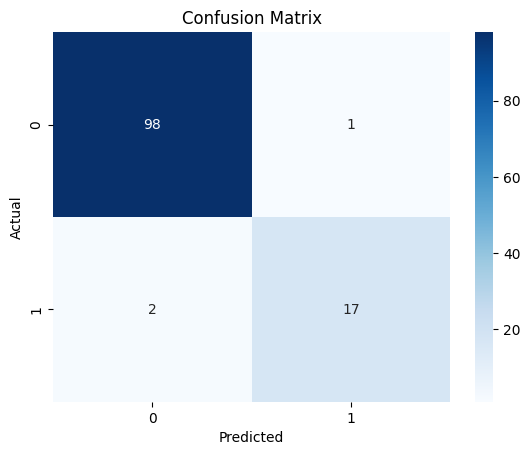

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
